# Analysis

This file contains the analysis of the results from the Doomsday guesser.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker

At first the .csv is read and inspected.

In [2]:
df = pd.read_csv('Doomsday.csv')
df.head()

,index,session,date_of_session,date_to_guess,day_of_week,guess,time
0,0,1,2022-03-19,1901-07-28,0,0,40.7412
1,1,1,2022-03-19,2216-12-29,0,0,47.2239
2,2,1,2022-03-19,1710-08-20,3,3,40.9176
3,3,1,2022-03-19,2446-05-31,4,4,46.7980
4,4,1,2022-03-19,1766-06-09,1,1,37.2850


To check, if the datatypes got properly recognised, the data types of each column are checked. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            137 non-null    int64  
 1   session          137 non-null    int64  
 2   date_of_session  137 non-null    object 
 3   date_to_guess    137 non-null    object 
 4   day_of_week      137 non-null    int64  
 5   guess            137 non-null    int64  
 6   time             137 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 7.6+ KB


To check the datatypes of the dates the first entries of the two columns are inspected.

In [5]:
print(type(df['date_of_session'][0]))
print(type(df['date_to_guess'][0]))

<class 'str'>
<class 'str'>


While they aren't recognised as dates, that's not an issue for now. Instead of the 'date_of_session' the session number can be used. And in case of the 'date_to_guess' the large range of dates might to to large for the pandas date calss. Also, for the date_to_guess the dates itself aren't very importent, only the subcomponends (month, year, century)

In [6]:
date_split = df['date_to_guess'].str.split(pat='-', n=-1, expand=True)

df['year_to_guess'] = date_split[0].astype(int)
df['month_to_guess'] = date_split[1].astype(int)
df['day_to_guess'] = date_split[2].astype(int)
df['century_to_guess'] = df['year_to_guess']//100*100
df['two_digit_year_to_guess'] = df['year_to_guess']-df['century_to_guess']

df.head()

,index,session,date_of_session,date_to_guess,day_of_week,guess,time,year_to_guess,month_to_guess,day_to_guess,century_to_guess,two_digit_year_to_guess
0,0,1,2022-03-19,1901-07-28,0,0,40.7412,1901,7,28,1900,1
1,1,1,2022-03-19,2216-12-29,0,0,47.2239,2216,12,29,2200,16
2,2,1,2022-03-19,1710-08-20,3,3,40.9176,1710,8,20,1700,10
3,3,1,2022-03-19,2446-05-31,4,4,46.7980,2446,5,31,2400,46
4,4,1,2022-03-19,1766-06-09,1,1,37.2850,1766,6,9,1700,66


In addition, it will be interesting, which guesses are correct and which are not.

In [11]:
df['correct_guess'] = np.where((df['day_of_week']==df['guess']), 1, 0)
df.head()

,index,session,date_of_session,date_to_guess,day_of_week,guess,time,year_to_guess,month_to_guess,day_to_guess,century_to_guess,two_digit_year_to_guess,correct_guess
0,0,1,2022-03-19,1901-07-28,0,0,40.7412,1901,7,28,1900,1,1
1,1,1,2022-03-19,2216-12-29,0,0,47.2239,2216,12,29,2200,16,1
2,2,1,2022-03-19,1710-08-20,3,3,40.9176,1710,8,20,1700,10,1
3,3,1,2022-03-19,2446-05-31,4,4,46.7980,2446,5,31,2400,46,1
4,4,1,2022-03-19,1766-06-09,1,1,37.2850,1766,6,9,1700,66,1


Because the analysis will focus on the proportion of correct guesses, the time, and counts per session, per month, per year, per century, ... it might be repetitive. To avoid repeading code, a function can be created to deal with all of it. 

In [12]:
def multiplot(df, plot_by):

    df = df.astype({plot_by: str})

    plt.rcParams["figure.figsize"] = (5,7)

    # lists of all important values for visualization
    values = ['counts', 'avg time', 'correct_guess']
    lables = ['Number of Guesses', 'Average Time per Guess', 'Proportion of correct Guesses']
    y_limits = [(max(df['counts'])+10)//10*10, (max(df['avg time'])+10)//10*10, 1]
    y_ticks_steps = [10, 10, 0.2]

    fig, axs = plt.subplots(3, 1)

    for i in range(3):
        axs[i].bar(df[plot_by], df[values[i]])
        axs[i].set_title(lables[i])
        axs[i].set_ylim(0, y_limits[i])
        axs[i].yaxis.set_major_locator(ticker.MultipleLocator(y_ticks_steps[i]))
        axs[i].grid(axis='y')

    fig.suptitle(f'Results per {plot_by}')

    fig.tight_layout()
    plt.show()

Because the function multiplot() needs an summarized dataframe and this will also be repetitive, another function can be created.

In [13]:
def summarize_df(df, summarize_by):
    '''Summarizes a dataframe by a given value. 
    Calculates counts, mean time, and proportion of correct guesses for this summarized dataframe.'''
    factors_for_df_summarized = [summarize_by, 'time', 'correct_guess']
    
    sub_df = df[factors_for_df_summarized] # contains only the columns of interest 

    df_summarized = sub_df.groupby(summarize_by).agg({summarize_by:'size', 'time':'mean', 'correct_guess':'mean'})
    # set new ordering of columns
    df_summarized.reindex([summarize_by,'time','correct_guess'], axis=1)
    # reset index
    df_summarized = df_summarized.rename_axis(None).reset_index()
    #set new column names
    df_summarized.columns = [summarize_by,'counts','avg time','correct_guess']

    return df_summarized

And finally, because one function summarizes the dataframe and the other function visualizes a dataframe, the can be brought together in one function.

In [14]:
def analyse_factor(dataframe, factor):
    summerazed_df = summarize_df(dataframe, factor)
    multiplot(summerazed_df, factor)

Now, different factors can be analysed. 
Lets start with 'session'.

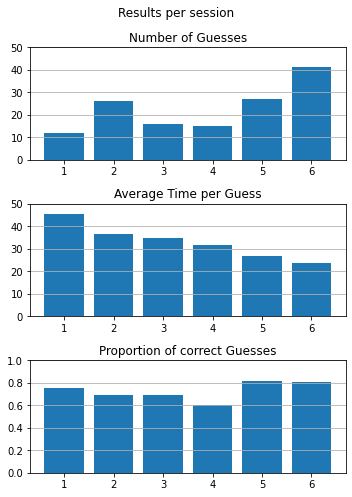

In [15]:
analyse_factor(df, 'session')

Next, Results per century can be inspected. 
Note that the centurys 1500 and 2400 should be underrepresented because somwhere in these centurys are the limits for the random date.

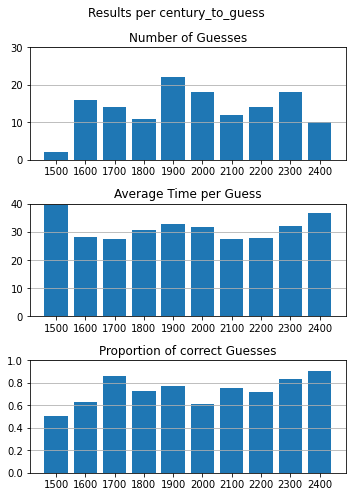

In [16]:
analyse_factor(df, 'century_to_guess')

Now the months can be inspected.

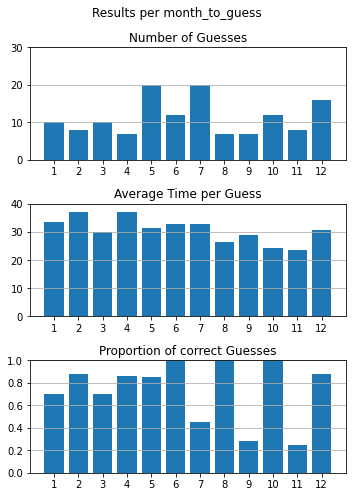

In [17]:
analyse_factor(df, 'month_to_guess')

As today (24.03.2022, 6 sessions) the graph clearly indicates a low proportion of correct guesses with the months 7, 9, and 11. This is probobly due to the confusion of the doomsdays for this months (5.7.; 11.9.; 9.11.).